In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import seaborn as sns
%matplotlib inline

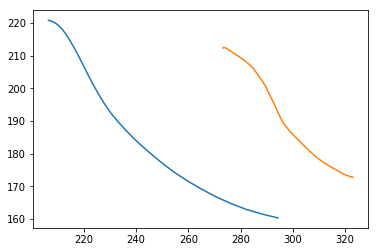

In [15]:
data = np.loadtxt("Data1_Rema1_Joelho.txt", delimiter=',')
#data2 = np.loadtxt("Data2_Rema1_Cotovelo.txt", delimiter= ',')
x = data[:, 0]
y = data[:, 1]
plt.plot(x, y)

data = np.loadtxt("Data2_Rema1_Joelho.txt", delimiter=',')
z = data[:, 0] # z é o equivalente ao eixo x
w = data[:, 1] # w é o equivalente ao eixo y
plt.plot(z, w) # a volta nao esta completa

In [19]:
distances = np.zeros((len(x), len(z)))
for i in range(len(z)):
    for j in range(len(x)):
        distances[i,j] = (x[j]-z[i])**2  # percorrendo a matriz e calculando distâncias euclidianas#
distances

array([[  825.76972877,  1205.65684569,  1662.2991733 , ...,
        13442.63672771, 13543.37875629, 13611.2740049 ],
       [  755.93395806,  1120.95148053,  1562.56928389, ...,
        13156.18845776, 13255.85336821, 13323.02494966],
       [  669.05548886,  1014.57967136,  1436.50102903, ...,
        12785.3411751 , 12883.59403426, 12949.81692204],
       ...,
       [  411.06575339,   204.15826697,    67.89204003, ...,
         4479.81491067,  4538.05093069,  4577.38830649],
       [  435.57983617,   221.53908734,    78.06527485, ...,
         4400.41534579,  4458.13464921,  4497.12486639],
       [  441.15337318,   225.51903211,    80.43502337, ...,
         4382.77426194,  4440.37812932,  4479.29079023]])

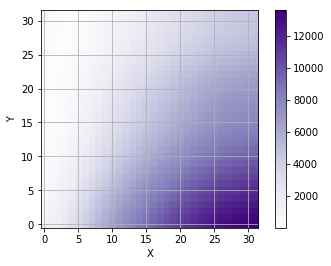

In [21]:
def distance_cost_plot(distances): # função que plota os valores com cores
    im = plt.imshow(distances, interpolation='nearest', cmap='Purples') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();
distance_cost_plot(distances)

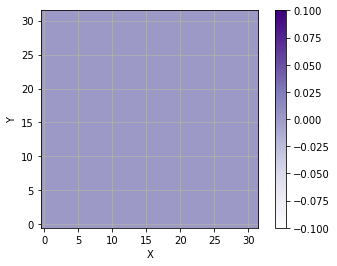

In [22]:
accumulated_cost = np.zeros((len(z), len(x)))
distance_cost_plot(accumulated_cost)

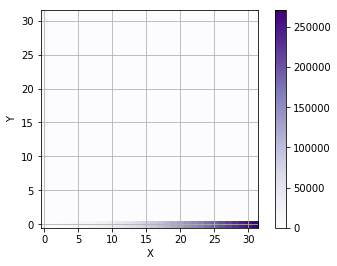

In [23]:
for i in range(1, len(x)): 
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1] # preenche as colunas conforme o menor valor anterior
    for i in range(1, len(y)):
        accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0] # preenche a matriz conforme o menor valor anterior
distance_cost_plot(accumulated_cost)

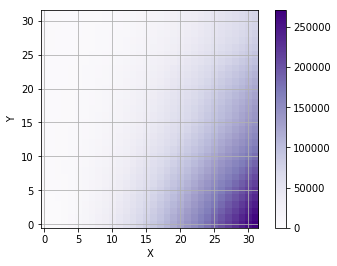

In [24]:
for i in range(1, len(z)): # percorrendo todas as linhas e colunas simultaneamente
    for j in range(1, len(x)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]
distance_cost_plot(accumulated_cost)

In [26]:
path = [[len(x)-1, len(z)-1]] # iniciando do tamanho máximo dos vetores
i = len(z)-1 
j = len(x)-1
while i > 0 and j > 0: # enquanto não encontrar a posição (0, 0)
    if i == 0:
        j = j - 1
    elif j == 0:
        i = i - 1
    else:
        if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            i = i - 1
        elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            j = j - 1
        else:
            i = i - 1
            j= j- 1
    path.append([j, i])
path.append([0,0])
#path

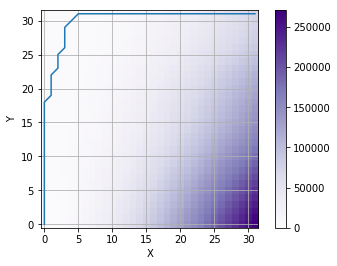

In [27]:
path_x = [point[0] for point in path]
path_z = [point[1] for point in path]

distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_z);

In [28]:
def path_cost(x, z, accumulated_cost, distances):
    path = [[len(x)-1, len(z)-1]]
    cost = 0
    i = len(z)-1
    j = len(x)-1
    while i > 0 and j > 0:
        if i == 0:
            j = j - 1
        elif j == 0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [z, x] in path:
        cost = cost + distances[x, z]
    return path, cost

31 206.36205117380965 : 31 220.88485940584727
30 206.65339283868266 : 31 220.88485940584727
29 207.08703057418722 : 31 220.88485940584727
28 207.65378079309266 : 31 220.88485940584727
27 208.38028892392833 : 31 220.88485940584727
26 209.27369625671327 : 31 220.88485940584727
25 210.3278814252205 : 31 220.88485940584727
24 211.52749138473663 : 31 220.88485940584727
23 212.88587673850645 : 31 220.88485940584727
22 214.39997828102975 : 31 220.88485940584727
21 216.05330713653674 : 31 220.88485940584727
20 217.79814872964516 : 31 220.88485940584727
19 219.62165280273388 : 31 220.88485940584727
18 221.53221570464476 : 31 220.88485940584727
17 223.57439240268033 : 31 220.88485940584727
16 225.68652458917316 : 31 220.88485940584727
15 227.91417845725502 : 31 220.88485940584727
14 230.2909684246927 : 31 220.88485940584727
13 232.86548168513272 : 31 220.88485940584727
12 235.63370303938882 : 31 220.88485940584727
11 238.64938245963674 : 31 220.88485940584727
10 241.96872844997228 : 31 220.88485

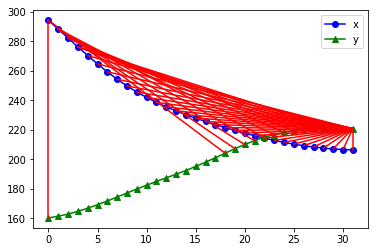

In [29]:
plt.plot(x, 'bo-' ,label = 'x')
plt.plot(y, 'g^-', label = 'y')
plt.legend();
paths = path_cost(x, y, accumulated_cost, distances)[0]
for [map_x, map_y] in paths:
    print (map_x, x[map_x], ":", map_y, y[map_y])
    
    plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'r')